<h1>Visualize data<h1>

Import all the necessary libraries

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

from getting_and_init_the_data import get_dataset, get_data_loader
from pathlib import Path
from openTSNE import TSNE
from parameters import *
from feature_extractor import FeatureExtractor
from mask_unet import MaskUnet
from utils import *
from torchaudio.transforms import MelScale, AmplitudeToDB

In [2]:
import os
os.chdir('C:\\Users\\vgdilu\\Documents') # change to your working directory

Load the feature extractor

In [3]:
# Check if CUDA, or MPS on Mac ARM is available, else use CPU
if torch.has_mps:
    device = 'mps'
elif torch.has_cuda:
    device = 'cuda'
else:
    device = 'cpu'
print(f'Process on {device}', '\n\n')

if (device == 'cuda'):
    print(f'Device name: {torch.cuda.get_device_name(0)}', '\n\n')

Process on cpu 




In [4]:
# Initiate the feature extractor, sound event detector and speech activity discriminator
feature_extractor_supervised = FeatureExtractor(
    conv_1_output_dim=conv_1_output_dim,
    conv_2_output_dim=conv_2_output_dim,
    conv_3_output_dim=conv_3_output_dim,
    conv_4_output_dim=conv_4_output_dim,
    conv_1_kernel_size=conv_1_kernel_size,
    conv_2_kernel_size=conv_2_kernel_size,
    conv_3_kernel_size=conv_3_kernel_size,
    conv_4_kernel_size=conv_4_kernel_size,
    pooling_1_kernel_size=pooling_1_kernel_size,
    pooling_2_kernel_size=pooling_2_kernel_size,
    pooling_3_kernel_size=pooling_3_kernel_size,
    global_pooling_kernel_size = global_pooling_kernel_size,
    output_feature_length=output_feature_length,
).to(device)

feature_extractor_rdal = FeatureExtractor(
    conv_1_output_dim=conv_1_output_dim,
    conv_2_output_dim=conv_2_output_dim,
    conv_3_output_dim=conv_3_output_dim,
    conv_4_output_dim=conv_4_output_dim,
    conv_1_kernel_size=conv_1_kernel_size,
    conv_2_kernel_size=conv_2_kernel_size,
    conv_3_kernel_size=conv_3_kernel_size,
    conv_4_kernel_size=conv_4_kernel_size,
    pooling_1_kernel_size=pooling_1_kernel_size,
    pooling_2_kernel_size=pooling_2_kernel_size,
    pooling_3_kernel_size=pooling_3_kernel_size,
    global_pooling_kernel_size = global_pooling_kernel_size,
    output_feature_length=output_feature_length,
).to(device)

# Getting and initializing the data
train_data_loader = get_data_loader(get_dataset('train', PICKLE_DATA), batch_size=32, shuffle=True, drop_last=False)
test_data_loader = get_data_loader(get_dataset('eval', PICKLE_DATA), batch_size=32, shuffle=False, drop_last=False)

Load supervised feature extractor and speech discriminator

In [5]:
feature_extractor_supervised_path = Path('RDAL\\models\\tsne_supervised\\best_feature_extractor.pt')
print('Feature extractor: ', str(feature_extractor_supervised_path))
feature_extractor_supervised.load_state_dict(torch.load(feature_extractor_supervised_path, map_location=torch.device(device)))
feature_extractor_supervised.eval()

Feature extractor:  RDAL\models\tsne_supervised\best_feature_extractor.pt


FeatureExtractor(
  (block_1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout2d(p=0.25, inplace=False)
  )
  (block_2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout2d(p=0.25, inplace=False)
  )
  (block_3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout2d(p=0.25, inplace=False)
  )
  (block_4): Sequenti

Load adversarial training feature extractor and speech discriminator

In [6]:
feature_extractor_rdal_path = Path('RDAL\\models\\rdal\\724\\best_feature_extractor_2549.pt')
print('Feature extractor: ', str(feature_extractor_rdal_path))
feature_extractor_rdal.load_state_dict(torch.load(feature_extractor_rdal_path, map_location=torch.device(device)))
feature_extractor_rdal.eval()

Feature extractor:  RDAL\models\rdal\724\best_feature_extractor_2549.pt


FeatureExtractor(
  (block_1): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout2d(p=0.25, inplace=False)
  )
  (block_2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout2d(p=0.25, inplace=False)
  )
  (block_3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Dropout2d(p=0.25, inplace=False)
  )
  (block_4): Sequenti

<h2>TSNE analysis on supervised</h2>

Compute the supervised features on training data

In [7]:
data_loader = train_data_loader
melscale_transform = MelScale(n_mels=64, sample_rate=44100, n_stft=1411//2+1, norm='slaney', mel_scale='slaney').to(device)
power_transform = AmplitudeToDB(stype="power", top_db=80).to(device)

features_speech_supervised_trains = []
features_no_speech_supervised_trains = []

speech_event_labels = []
no_speech_event_labels = []

for batch in data_loader:
    # Get the batches.
    speech_samples, speech_event_label, speech_speech_label, speech_event, speech_gender_label, \
    no_speech_samples, no_speech_event_label, no_speech_speech_label, no_speech_event, no_speech_gender_label = batch

    # Reshape the samples
    speech = speech_samples.float().to(device).unsqueeze(dim=1)
    no_speech = no_speech_samples.float().to(device).unsqueeze(dim=1)

    mel_speech = power_transform(melscale_transform(speech**2))
    mel_no_speech = power_transform(melscale_transform(no_speech**2))

    # Compute the features
    features_speech_supervised_train = feature_extractor_supervised(mel_speech)
    features_no_speech_supervised_train = feature_extractor_supervised(mel_no_speech)

    # Convert the tensors to numpy array
    features_speech_supervised_train = features_speech_supervised_train.detach().numpy()
    features_no_speech_supervised_train = features_no_speech_supervised_train.detach().numpy()

    features_speech_supervised_trains.append(features_speech_supervised_train)
    features_no_speech_supervised_trains.append(features_no_speech_supervised_train)

    speech_event_labels.append(speech_event_label.numpy())
    no_speech_event_labels.append(no_speech_event_label.numpy())

features_speech_supervised_trains = np.concatenate(features_speech_supervised_trains)
features_no_speech_supervised_trains = np.concatenate(features_no_speech_supervised_trains)
speech_event_labels = np.concatenate(speech_event_labels)
no_speech_event_labels = np.concatenate(no_speech_event_labels)

features_supervised = np.concatenate((features_speech_supervised_trains, features_no_speech_supervised_trains))

In [8]:
tsne = TSNE(
    n_components=2,
    initialization='pca',
    perplexity=50,
    n_iter=1000)

embedding_train = tsne.fit(features_supervised)

In [9]:
reduced_speech_supervised_train = embedding_train.transform(features_speech_supervised_trains)
reduced_no_speech_supervised_train = embedding_train.transform(features_no_speech_supervised_trains)

Plot the scatter plot of the features

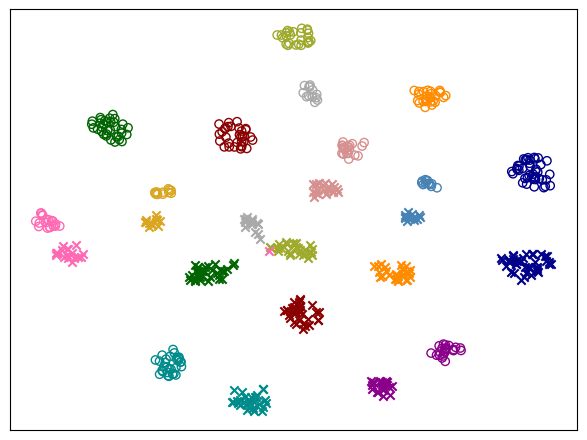

In [10]:
color = ['darkblue', 'darkgreen', 'darkred', 'darkorange', '#9EAA2C', 'darkcyan', '#D69090', 'darkmagenta', 'darkgray', 'goldenrod', 'steelblue', 'hotpink']
fig, ax = plt.subplots()
plt.tight_layout()
for i in range(len(FREESOUND_LABELS)):
    reduced_speech_supervised_sound = reduced_speech_supervised_train[np.where(speech_event_labels==i)]
    reduced_no_speech_supervised_sound = reduced_no_speech_supervised_train[np.where(no_speech_event_labels==i)]

    speech_idx = np.random.choice(np.arange(start=0, stop=len(reduced_speech_supervised_sound), step=1), size=len(reduced_speech_supervised_sound)//7, replace=False)
    no_speech_idx = np.random.choice(np.arange(start=0, stop=len(reduced_no_speech_supervised_sound), step=1), size=len(reduced_no_speech_supervised_sound)//7, replace=False)

    filtered_speech_supervised_train = reduced_speech_supervised_sound[speech_idx]
    filtered_no_speech_supervised_train = reduced_no_speech_supervised_sound[no_speech_idx]

    ax.scatter(filtered_speech_supervised_train[:,0], filtered_speech_supervised_train[:,1], facecolors='none', edgecolors=color[i], label=FREESOUND_LABELS[i])
    ax.scatter(filtered_no_speech_supervised_train[:,0], filtered_no_speech_supervised_train[:,1], c=color[i], marker="x", label=FREESOUND_LABELS[i])

ax.set_xticklabels([])
ax.set_yticklabels([])
plt.tick_params(left = False, bottom = False)
plt.show()

<h2>TSNE analysis on RDAL</h2>
The plot looks different from what was presented in the paper because the previously trained models are nor available and the new models are retrained

In [11]:
data_loader = train_data_loader
melscale_transform = MelScale(n_mels=64, sample_rate=44100, n_stft=1411//2+1, norm='slaney', mel_scale='slaney').to(device)
power_transform = AmplitudeToDB(stype="power", top_db=80).to(device)

features_speech_rdal_trains = []
features_no_speech_rdal_trains = []

speech_event_labels = []
no_speech_event_labels = []


for batch in data_loader:
    # Get the batches.
    speech_samples, speech_event_label, speech_speech_label, speech_event, speech_gender_label, \
    no_speech_samples, no_speech_event_label, no_speech_speech_label, no_speech_event, no_speech_gender_label = batch

    # Reshape the samples
    speech = speech_samples.float().unsqueeze(dim=1).to(device)
    no_speech = no_speech_samples.float().unsqueeze(dim=1).to(device)

    mel_speech = melscale_transform(speech**2)
    mel_speech = power_transform(mel_speech)
    
    mel_no_speech = melscale_transform(no_speech**2)
    mel_no_speech = power_transform(mel_no_speech)

    # Compute the features
    features_speech_rdal_train = feature_extractor_rdal(mel_speech)
    features_no_speech_rdal_train = feature_extractor_rdal(mel_no_speech)

    # Convert the tensors to numpy array
    features_speech_rdal_train = features_speech_rdal_train.detach().numpy()
    features_no_speech_rdal_train = features_no_speech_rdal_train.detach().numpy()

    features_speech_rdal_trains.append(features_speech_rdal_train)
    features_no_speech_rdal_trains.append(features_no_speech_rdal_train)

    speech_event_labels.append(speech_event_label.numpy())
    no_speech_event_labels.append(no_speech_event_label.numpy())

features_speech_rdal_trains = np.concatenate(features_speech_rdal_trains)
features_no_speech_rdal_trains = np.concatenate(features_no_speech_rdal_trains)

speech_event_labels = np.concatenate(speech_event_labels)
no_speech_event_labels = np.concatenate(no_speech_event_labels)

In [12]:
features_rdal = np.concatenate((features_speech_rdal_trains, features_no_speech_rdal_trains))

tsne = TSNE(
    n_components=2,
    initialization='pca',
    perplexity=50,
    n_iter=1000
)
embedding_train = tsne.fit(features_rdal)

In [13]:
reduced_speech_rdal_train = embedding_train.transform(features_speech_rdal_trains)
reduced_no_speech_rdal_train = embedding_train.transform(features_no_speech_rdal_trains)

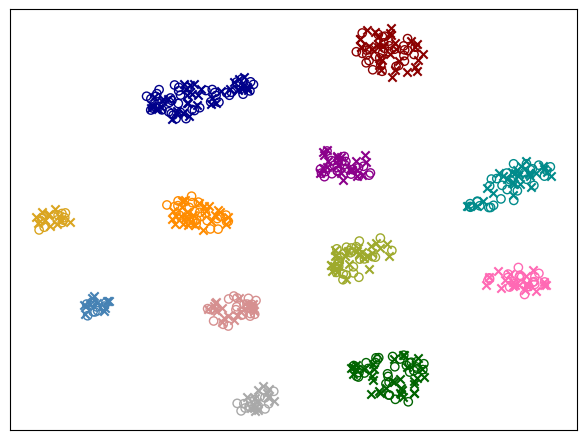

In [14]:
color = ['darkblue', 'darkgreen', 'darkred', 'darkorange', '#9EAA2C', 'darkcyan', '#D69090', 'darkmagenta', 'darkgray', 'goldenrod', 'steelblue', 'hotpink']

fig, ax = plt.subplots()
plt.tight_layout()
for i in range(len(FREESOUND_LABELS)):
    reduced_speech_rdal_sound = reduced_speech_rdal_train[np.where(speech_event_labels==i)]
    reduced_no_speech_rdal_sound = reduced_no_speech_rdal_train[np.where(no_speech_event_labels==i)]

    speech_idx = np.random.choice(np.arange(start=0, stop=len(reduced_speech_rdal_sound), step=1), size=len(reduced_speech_rdal_sound)//7, replace=False)
    no_speech_idx = np.random.choice(np.arange(start=0, stop=len(reduced_no_speech_rdal_sound), step=1), size=len(reduced_no_speech_rdal_sound)//7, replace=False)

    filtered_speech_rdal_train = reduced_speech_rdal_sound[speech_idx]
    filtered_no_speech_rdal_train = reduced_no_speech_rdal_sound[no_speech_idx]

    ax.scatter(filtered_speech_rdal_train[:,0], filtered_speech_rdal_train[:,1], facecolors='none', edgecolors=color[i], label=FREESOUND_LABELS[i])
    ax.scatter(filtered_no_speech_rdal_train[:,0], filtered_no_speech_rdal_train[:,1], c=color[i], marker="x", label=FREESOUND_LABELS[i])

ax.set_xticklabels([])
ax.set_yticklabels([])
plt.tick_params(left = False, bottom = False)
plt.show()